To start the EDA, I will import all the libraries I will use, such as Pandas, for functions and methods to manipulate the data in this library and Numpy to solve mathematical problems.

In [113]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

I used the 'pd.read_csv' method to access the file that I want to work with.
The warning indicates that Pandas has encountered columns in the DataFrame where the data types are inconsistent throughout, meaning that both strings and numbers are within the same column. I will handle it during the cleaning process.

In [114]:
df = pd.read_csv('2021VAERSDATA_.csv', encoding='ISO-8859-1')
orig_df = df.copy()

C:\Users\danie\AppData\Local\Temp\ipykernel_4240\1116616066.py:1: DtypeWarning: Columns (2,3,5,7,12,23,31,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021VAERSDATA_.csv', encoding='ISO-8859-1')


In [115]:
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916767,1/1/221,AK,54,54.0,NaN,F,NaN,Hypotension ticed 24 hours post injectionU Ef...,NaN,...,NaN,HTN,NaN,NaN,2,1/1/221,NaN,NaN,NaN,"ADVAIR, ASMAX, FORADIL, TRAMADOL"
1,918694,1/1/221,AK,23,25.0,NaN,F,NaN,"12/24/22 chills body aches headache, fever of...",NaN,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,Y,Altace
2,917613,1/2/221,AK,31,31.0,NaN,F,NaN,"Fatigue, chills, pain at injection site radiat...",NaN,...,NaN,"Asthma, adhd",Tetanus,NaN,2,1/2/221,NaN,NaN,NaN,Aspergillus
3,918693,1/2/221,AK,6,6.0,NaN,F,NaN,"Starting at 1 am I ticed chills, body aches, v...",NaN,...,NaN,NaN,NaN,NaN,2,1/2/221,NaN,NaN,Y,Aspirin
4,91887,1/4/221,AK,49,49.0,NaN,M,NaN,Patient got his Covid vaccine this past Thursd...,NaN,...,NaN,"Obesity, pre-diabetes",NaN,NaN,2,1/4/221,NaN,NaN,Y,Cephalosporin


I used the method df.shape to have an idea of the dataset size. And I found that this dataset has 34121 rows and 35 columns.

In [116]:
df.shape

(34121, 35)

With the describe() method, I can see that in this dataset, there is only a skewed distribution in two columns ('HOSPDAYS' and 'NUMDAYS') by comparing the values of mean and median (50% value). The other columns are normally distributed. Thus, I will start the cleaning process, but first, I will select the principal features that can be useful to anwser the project questions. 

In [117]:
df.describe()

,VAERS_ID,CAGE_YR,HOSPDAYS,NUMDAYS,FORM_VERS
count,3.412100e+04,26716.000000,2857.000000,17738.000000,34121.000000
mean,4.236210e+05,46.290800,3.554428,29.728267,1.998124
std,4.146203e+05,22.466735,3.671364,768.794004,0.043269
min,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,9.265500e+04,32.000000,1.000000,1.000000,2.000000
50%,1.517760e+05,46.000000,2.000000,2.000000,2.000000
75%,9.253510e+05,62.000000,4.000000,7.000000,2.000000
max,1.115348e+06,99.000000,39.000000,36896.000000,2.000000


## Cleaning data

To start the cleaning process, I will use the method df.info() because it provides a quick overview of the structure and some basic information about the DataFrame, like data type and if there are missing values. In this case, the dataset presents all the values (no missing values). 

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30932 non-null  object 
 4   CAGE_YR       26716 non-null  float64
 5   CAGE_MO       18 non-null     object 
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34107 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

The method below returns True where there is a NaN (Not a Number) value and False otherwise to indicate the presence of missing values. 

The data use guide (Vaccine Adverse Event Reporting System - VAERS) contains essential information about this dataset, like how it was created and filled, for example, in the 'DIED' column, where they used the letter "Y" to indicate that the patient dies and otherwise the field will be blank. Thus, that is the reason why there is NaN in this dataset. In this case, I will transform the NaN in zeros to represent the absence of occurrence.

Example of data use guide: DIED - If the vaccine recipient died a "Y" is used; otherwise the field will be blank.

In [119]:
df.isnull().sum()

VAERS_ID            0
RECVDATE            0
STATE            5571
AGE_YRS          3189
CAGE_YR          7405
CAGE_MO         34103
SEX                 0
RPT_DATE        34058
SYMPTOM_TEXT       14
DIED            32164
DATEDIED        32323
L_THREAT        32862
ER_VISIT        34110
HOSPITAL        29734
HOSPDAYS        31264
X_STAY          34069
DISABLE         33251
RECOVD           2857
VAX_DATE         1499
ONSET_DATE       1863
NUMDAYS         16383
LAB_DATA        24149
V_ADMINBY           0
V_FUNDBY        34057
OTHER_MEDS      16680
CUR_ILL         28198
HISTORY         16838
PRIOR_VAX       32687
SPLTTYPE        25901
FORM_VERS           0
TODAYS_DATE       199
BIRTH_DEFECT    34070
OFC_VISIT       28717
ER_ED_VISIT     28592
ALLERGIES       21045
dtype: int64

As this dataset is vast, I will use the .value_counts() function in the 'STATE' column to know how many records are in each category and focus on one State that satisfies the minimum requirement of the project. Then, I will create a subset with this category. 

This code showed me that I can use the CA State alone or enjoy more than one. I prefer to work with the CA because it is a cosmopolitan place with people from different ethnicities, which may reduce the probability of bias.

In [120]:
category_counts = df['STATE'].value_counts()
print(category_counts)

CA    2577
TX    1807
NY    1783
FL    1654
IN    1142
IL    1135
OH    1072
PA    1012
MI     921
MA     842
NJ     836
NC     752
VA     727
MD     693
AZ     659
WI     649
WA     630
GA     628
CO     617
MN     604
MO     556
TN     526
CT     524
KY     443
OR     363
IA     336
OK     333
LA     317
AL     295
KS     295
SC     286
AR     266
NE     263
MT     262
ME     235
NM     229
UT     229
WV     220
NH     203
NV     197
PR     195
AK     167
ID     157
MS     150
HI     134
SD     116
RI     112
VT     105
ND     101
DE      66
DC      55
WY      53
GU       7
VI       4
MP       3
AS       3
MH       1
FM       1
Ca       1
XB       1
Name: STATE, dtype: int64


Below, I will create the subset with the CA category and work with it from now on. This subset will be named as 'df1'.

In [121]:
by_category = df.groupby('STATE')
df1 = by_category.get_group('CA')
df1.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
1390,91661,1/1/221,CA,73,73.0,NaN,F,NaN,Approximately 3 min post vaccition administrat...,NaN,...,U,U,NaN,NaN,2,1/1/221,NaN,Y,NaN,NaN
1391,916613,1/1/221,CA,4,4.0,NaN,F,NaN,On 12/3/22 I got a pain in the stomach as if s...,NaN,...,NaN,NaN,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y
1392,916617,1/1/221,CA,35,35.0,NaN,F,NaN,"Dizziness, chills, fever, muscle aches, pain a...",NaN,...,NaN,Y,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y
1393,916621,1/1/221,CA,25,25.0,NaN,F,NaN,Fatigue - 2 hours priorU Muscle aches/pain - 3...,NaN,...,NaN,U,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y
1394,91669,1/1/221,CA,37,37.0,NaN,M,NaN,Typical sore arm similar to flu shotU Followin...,NaN,...,NaN,NaN,NaN,NaN,2,1/1/221,NaN,NaN,NaN,Y


In [122]:
df1.shape

(2577, 35)

 I will use the duplicated() method to eliminate records that may be repeated because it can generate misunderstanding conclusions. However in this dataset there is no duplicates as we can see below.

In [123]:
df1.duplicated().sum()

0

I will drop some columns that may not be necessary to answer my question and it could waste time and memory. After dropping, I will nominate the dataset as 'df2'.

In [124]:
df1.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [125]:
df2 = df1.drop(columns=['VAERS_ID', 'RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'SYMPTOM_TEXT', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT'])
df2.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,F,NaN,NaN,NaN,U,U,NaN
1391,4,F,NaN,NaN,NaN,NaN,NaN,Y
1392,35,F,NaN,NaN,NaN,NaN,Y,Y
1393,25,F,NaN,NaN,NaN,NaN,U,Y
1394,37,M,NaN,NaN,1.0,NaN,NaN,Y


In [126]:
df2.shape

(2577, 8)

In [127]:
df2.dtypes

AGE_YRS       object
SEX           object
DIED          object
DISABLE       object
NUMDAYS      float64
CUR_ILL       object
HISTORY       object
ALLERGIES     object
dtype: object

In [128]:
df2.describe()

,NUMDAYS
count,1318.000000
mean,8.770865
std,83.141858
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,2399.000000


I am using the function .isnull().sum() to calculate the numbers of missing (null and NaN) values in all columns of the dataset. 

In [129]:
df2.isnull().sum()

AGE_YRS       187
SEX             0
DIED         2422
DISABLE      2471
NUMDAYS      1259
CUR_ILL      2096
HISTORY      1148
ALLERGIES    1768
dtype: int64

Below, I am using the method .fillna() to replace the NaN with zero values.

In [130]:
df2.fillna(0, inplace=True)

In [131]:
df2.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,F,0,0,0.0,U,U,0
1391,4,F,0,0,0.0,0,0,Y
1392,35,F,0,0,0.0,0,Y,Y
1393,25,F,0,0,0.0,0,U,Y
1394,37,M,0,0,1.0,0,0,Y


I replaced all sentences reported in 'CUR_ILL', 'HISTORY', and 'ALLERGIES' with blank space, meaning the absence of the occurrence, 'U' when it was not informed, and 'Y' in the case in which the patient related any occurrence (from mild to several), thus, in this study, I will not make distinguish of the degree of illnesses or allergies. Below, I will present a dictionary with the replacement numbers to make possible the recognition by the models.

# Random Forest model

I chose to work with Random Forests, a supervised machine learning model because it is considered a robust method that combines multiple machine learning algorithms and is effective for classification and regression. It does not need heavy tunning of the parameters to achieve great accuracy. It can avoid or reduce overfitting by doing an average of many trees with a random subset by bootstrap sampling (Müller and Guido, 2017, p.83-87).

However, this model performs poorly in high dimensional, sparse, and text data (Müller and Guido, 2017, p.88). That is why I am preprocessing the data using the function .replace() to convert categorical data to numerical for all features.

Another advantage of using this model is that the class_weight parameter considers the same weight for all classes, which can reduce imbalanced class distribution in the training data.

## Pre-processing

In [20]:
df_rf = df2.copy()
df_rf.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73,F,0,0,0.0,U,U,0
1391,4,F,0,0,0.0,0,0,Y
1392,35,F,0,0,0.0,0,Y,Y
1393,25,F,0,0,0.0,0,U,Y
1394,37,M,0,0,1.0,0,0,Y


In [21]:
df_rf["DIED"].replace('0', 0, inplace=True)
df_rf["DIED"].replace('Y', 1, inplace=True)

In [22]:
df_rf["DIED"].value_counts()

0    2422
1     155
Name: DIED, dtype: int64

In [23]:
df_rf["SEX"].replace('F', 0, inplace=True)
df_rf["SEX"].replace('M', 1, inplace=True)
df_rf["SEX"].replace('U', 2, inplace=True)

In [24]:
df_rf["SEX"].value_counts()

0    1837
1     677
2      63
Name: SEX, dtype: int64

In [25]:
df_rf["DISABLE"].replace('0', 0, inplace=True)
df_rf["DISABLE"].replace('Y', 1, inplace=True)

In [26]:
df_rf["DISABLE"].value_counts()

0    2471
1     106
Name: DISABLE, dtype: int64

In [27]:
df_rf["CUR_ILL"].replace('0', 0, inplace=True)
df_rf["CUR_ILL"].replace('Y', 1, inplace=True)
df_rf["CUR_ILL"].replace('U', 2, inplace=True)

In [28]:
df_rf["CUR_ILL"].value_counts()

0    2096
1     349
2     132
Name: CUR_ILL, dtype: int64

In [29]:
df_rf["HISTORY"].replace('0', 0, inplace=True)
df_rf["HISTORY"].replace('Y', 1, inplace=True)
df_rf["HISTORY"].replace('U', 2, inplace=True)

In [30]:
df_rf["HISTORY"].value_counts()

1    1321
0    1148
2     108
Name: HISTORY, dtype: int64

In [31]:
df_rf["ALLERGIES"].replace('0', 0, inplace=True)
df_rf["ALLERGIES"].replace('Y', 1, inplace=True)
df_rf["ALLERGIES"].replace('U', 2, inplace=True)

In [32]:
df_rf["ALLERGIES"].value_counts()

0    1768
1     717
2      92
Name: ALLERGIES, dtype: int64

In [33]:
# Convert the values in the 'AGE_YRS' column to floats
df_rf['AGE_YRS'] = df_rf['AGE_YRS'].astype(float)

In [34]:
df_rf.dtypes

AGE_YRS      float64
SEX            int64
DIED           int64
DISABLE        int64
NUMDAYS      float64
CUR_ILL        int64
HISTORY        int64
ALLERGIES      int64
dtype: object

In [35]:
df_rf.head()

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73.0,0,0,0,0.0,2,2,0
1391,4.0,0,0,0,0.0,0,0,1
1392,35.0,0,0,0,0.0,0,1,1
1393,25.0,0,0,0,0.0,0,2,1
1394,37.0,1,0,0,1.0,0,0,1


#### Data Dictionary - dataset (df_rf):

1. AGE_YRS: The recorded vaccine recipient's age in years.

2. SEX: Sex of the vaccine recipient (M = Male, F = Female, Unknown = Blank). (1 = Male, 0 = Female, 2 = Unknown).

3. DIED: If the vaccine recipient died a "Y" is used; otherwise the field will be blank. (0 = Alive, 1 = Died)

4. DISABLE: If the vaccine recipient was disabled as a result of the vaccination a "Y" is placed in this field; otherwise the field will be blank. (0 = not disabled, 1 = disabled)

5. NUMDAYS: The calculated interval (in days) from the vaccination date to the onset date.

6. CUR_ILL: presence of any illnesses at the vaccination time is represented by the letter 'Y', otherwise, blank space for not occurrence, and 'U' for unknown. (0 = Not occurrence, 1 = Occurrence, 2 = Unknown)

7. HISTORY: presence of any pre-existing physician-diagnosed congenital disabilities or medical condition at the vaccination time is represented by the letter 'Y', otherwise, blank space for not occurrence, and 'U' for unknown. (0 = Not occurrence, 1 = Occurrence, 2 = Unknown)

8. ALLERGIES: presence of any pre-existing physician-diagnosed allergies at the vaccination time is represented by the letter 'Y', otherwise, blank space for not occurrence, and 'U' for unknown. (0 = Not occurrence, 1 = Occurrence, 2 = Unknown)

## Model implementation - Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier    
from sklearn.model_selection import train_test_split 
from sklearn import metrics                         

In [287]:
X = df_rf.drop('DIED', axis=1) 
y = df_rf['DIED']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 51)
X.shape, X.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2577, 7), (2577, 7), (2061, 7), (516, 7), (2061,), (516,))

### Hyperparameters
As mentioned above, this model performs well without heavy tunning of the parameters. The principal parameters are n_estimatores, max_features, and max_depth (Müller and Guido, 2017, p.88). The first is the number of trees; the more significant this number is, the smaller the overfitting. I chose to experiment with the 100 (default) and 1000.
The second parameter determines how random each tree is; by default, I use the 'sqrt(n_features)', which is suitable for classification. The max_depth parameter is the maximum depth of the tree, and in this case, I am using 'None' (default), which means that the nodes expand until all leaves are pure or until all leaves contain less than min_samples_split samples (Scikit-learn.org, 2012). 

In [288]:
#Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 1000, random_state = 51, class_weight='balanced', max_depth=5)

#Train the model using the training sets
clf_RF.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_RF.predict(X_test)

In [289]:
#Accuracy calculation
from sklearn import metrics

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.88


### Cross-Validation
Cross-validation is a statistical method used to assess the performance of a machine learning model by splitting the dataset into multiple subsets (folds), using the most known tool called k-fold cross-validation to specify the number of folds that will be trained and evaluating the model on different combinations of these folds (Müller and Guido, 2017, p.253).

**Interpretation: Using the mean cross-validation we can conclude that we expect the model to be around 84% accurate on average.** 

In [290]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_RF, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", scores)
print("Mean accuracy: ", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores:  [0.95930233 0.93217054 0.88737864 0.74757282 0.70097087]
Mean accuracy:  0.8454790396628283
Standard deviation: 0.10265960491510269


In [292]:
from sklearn import metrics

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )
print( "F1 Score: {:.2f}".format(metrics.f1_score(y_test, y_pred)) )

accuracy: 0.88
precision: 0.27
recall: 0.72
F1 Score: 0.40


##  Train and test - accuracy

In [294]:
print("Training Accuracy :", clf_RF.score(X_train, y_train))
print("Testing Accuracy :", clf_RF.score(X_test, y_test))

Training Accuracy : 0.871421639980592
Testing Accuracy : 0.875968992248062


### Important Features
The Random Forest provides feature importances calculated by aggregating the feature importances over the trees in the forest, which is more reliable than the presented in a single tree (Müller and Guido, 2017, p.86). 

The chart below shows which features contribute the most to the model's predictions.

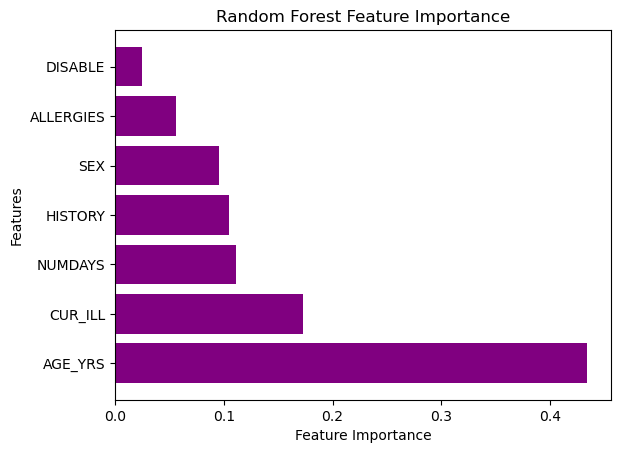

In [291]:
feature_imp = pd.Series(clf_RF.feature_importances_, index=X.columns).sort_values(ascending=False)
bar_color = 'purple'
plt.barh(feature_imp.index, feature_imp, color=bar_color)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

Text(50.722222222222214, 0.5, 'Actual')

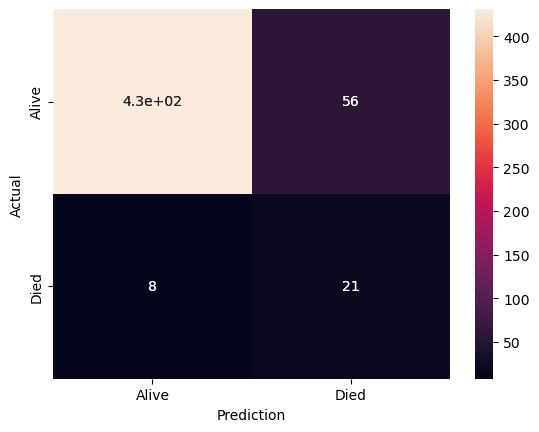

In [293]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
ax = sns.heatmap(cm, annot=True,                  
                 xticklabels=['Alive','Died'],                
                 yticklabels=['Alive','Died'],                  
                 cbar=False)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

## Model Evaluation: all features

In [295]:
from tabulate import tabulate
data = [
    ["Accuracy", 0.93, 0.94, 0.94],
    ["CV-Accuracy", 0.93, 0.93, 0.93],
    ["Precision", 0.40, 0.50, 0.43],
    ["Recall", 0.12, 0.24, 0.28],
    ["Training Accuracy", 0.99, 0.99, 0.99],
    ["Testing Accuracy", 0.93, 0.94, 0.93],
]   
headers = ["n_estimators = 100", "10%", "20%", "30%"]

data1 = [
    ["Accuracy", 0.93, 0.95, 0.94],
    ["CV-Accuracy", 0.93, 0.93, 0.93],
    ["Precision", 0.40, 0.56, 0.44],
    ["Recall", 0.12, 0.31, 0.26],
    ["Training Accuracy", 0.99, 0.99, 0.99],
    ["Testing Accuracy", 0.95, 0.95, 0.94],
]   
headers1 = ["n_estimators = 1000", "10%", "20%", "30%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print("CV = Cross-Validation")

+----------------------+-------+-------+-------+
| n_estimators = 100   |   10% |   20% |   30% |
+======================+=======+=======+=======+
| Accuracy             |  0.93 |  0.94 |  0.94 |
+----------------------+-------+-------+-------+
| CV-Accuracy          |  0.93 |  0.93 |  0.93 |
+----------------------+-------+-------+-------+
| Precision            |  0.4  |  0.5  |  0.43 |
+----------------------+-------+-------+-------+
| Recall               |  0.12 |  0.24 |  0.28 |
+----------------------+-------+-------+-------+
| Training Accuracy    |  0.99 |  0.99 |  0.99 |
+----------------------+-------+-------+-------+
| Testing Accuracy     |  0.93 |  0.94 |  0.93 |
+----------------------+-------+-------+-------+
+-----------------------+-------+-------+-------+
| n_estimators = 1000   |   10% |   20% |   30% |
+=======================+=======+=======+=======+
| Accuracy              |  0.93 |  0.95 |  0.94 |
+-----------------------+-------+-------+-------+
| CV-Accuracy  

### Adjusting hyperparameters

+------------------------------------------------+-------+
| n_estimators = 1000, class_weight='balanced'   |   20% |
+================================================+=======+
| Accuracy                                       |  0.94 |
+------------------------------------------------+-------+
| CV-Accuracy                                    |  0.92 |
+------------------------------------------------+-------+
| Precision                                      |  0.47 |
+------------------------------------------------+-------+
| Recall                                         |  0.31 |
+------------------------------------------------+-------+
| F1 Score                                       |  0.38 |
+------------------------------------------------+-------+
| Training Accuracy                              |  0.98 |
+------------------------------------------------+-------+
| Testing Accuracy                               |  0.94 |
+------------------------------------------------+------

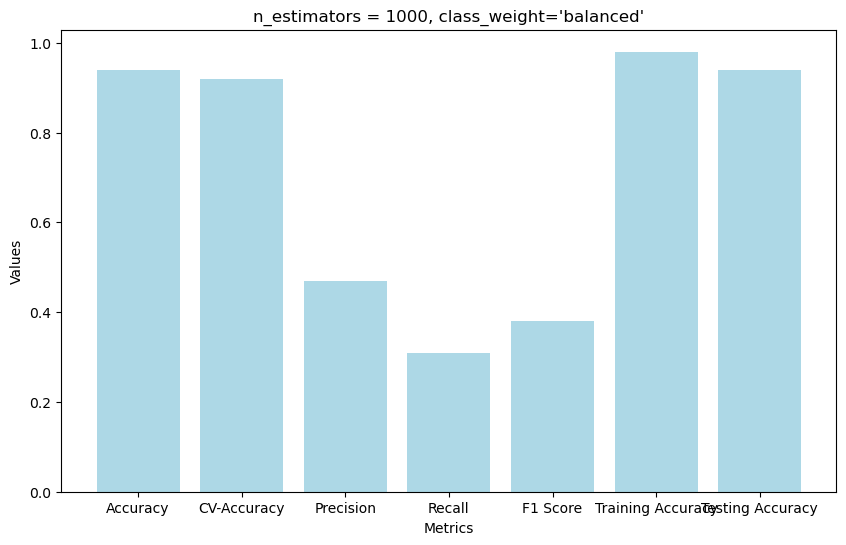

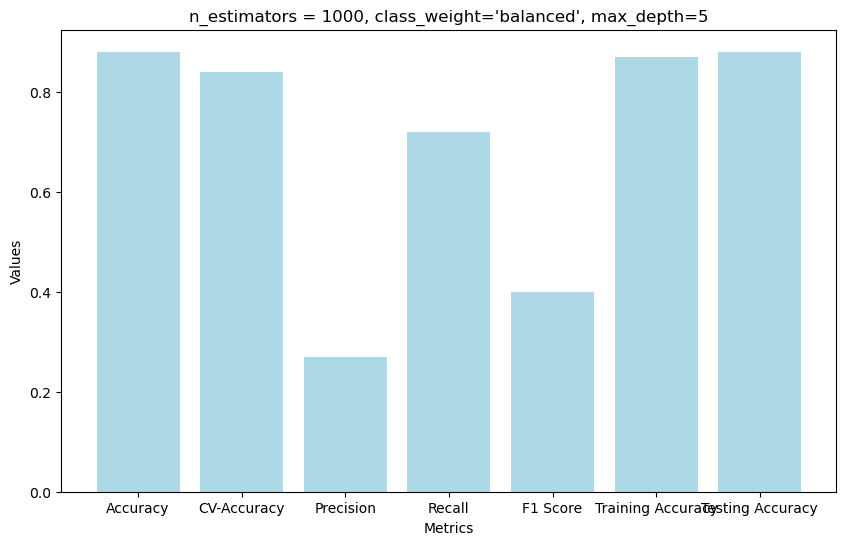

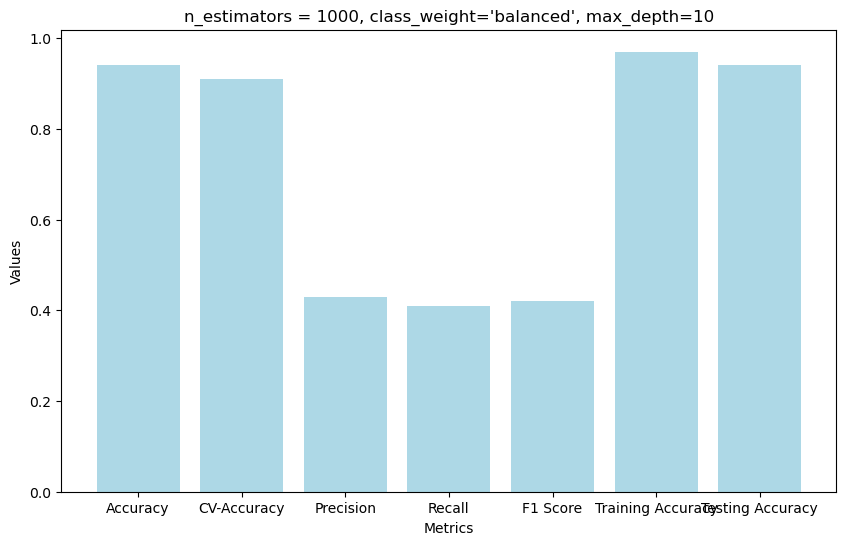

In [296]:
import matplotlib.pyplot as plt

data = [
    ["Accuracy", 0.94],
    ["CV-Accuracy", 0.92],
    ["Precision", 0.47],
    ["Recall", 0.31],
    ["F1 Score", 0.38],
    ["Training Accuracy", 0.98],
    ["Testing Accuracy", 0.94],
]   
headers = ["n_estimators = 1000, class_weight='balanced'", "20%"]

data1 = [
    ["Accuracy", 0.88],
    ["CV-Accuracy", 0.84],
    ["Precision", 0.27],
    ["Recall", 0.72],
    ["F1 Score", 0.40],
    ["Training Accuracy", 0.87],
    ["Testing Accuracy", 0.88],
]   
headers1 = ["n_estimators = 1000, class_weight='balanced', max_depth=5", "20%"]

data2 = [
    ["Accuracy", 0.94],
    ["CV-Accuracy", 0.91],
    ["Precision", 0.43],
    ["Recall", 0.41],
    ["F1 Score", 0.42],
    ["Training Accuracy", 0.97],
    ["Testing Accuracy", 0.94],
]   
headers2 = ["n_estimators = 1000, class_weight='balanced', max_depth=10", "20%"]


print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print(tabulate(data2, headers=headers2, tablefmt="grid"))
print("CV = Cross-Validation")

def plot_bar_chart(data, headers, title):
    labels = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightblue')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(title)
    plt.show()

plot_bar_chart(data, headers, "n_estimators = 1000, class_weight='balanced'")
plot_bar_chart(data1, headers1, "n_estimators = 1000, class_weight='balanced', max_depth=5")
plot_bar_chart(data2, headers2, "n_estimators = 1000, class_weight='balanced', max_depth=10")

## Model Evaluation: all features four features: DISABLE, CUR_ILL, HISTORY, ALLERGIES
#### (n_estimators = 1000, random_state = 51, class_weight='balanced', max_depth=5)

+-------------------------------------------------------------+-------+
| n_estimators = 1000, class_weight='balanced', max_depth=5   |   20% |
+=============================================================+=======+
| Accuracy                                                    |  0.86 |
+-------------------------------------------------------------+-------+
| CV-Accuracy                                                 |  0.72 |
+-------------------------------------------------------------+-------+
| Precision                                                   |  0.17 |
+-------------------------------------------------------------+-------+
| Recall                                                      |  0.38 |
+-------------------------------------------------------------+-------+
| F1 Score                                                    |  0.23 |
+-------------------------------------------------------------+-------+
| Training Accuracy                                           | 

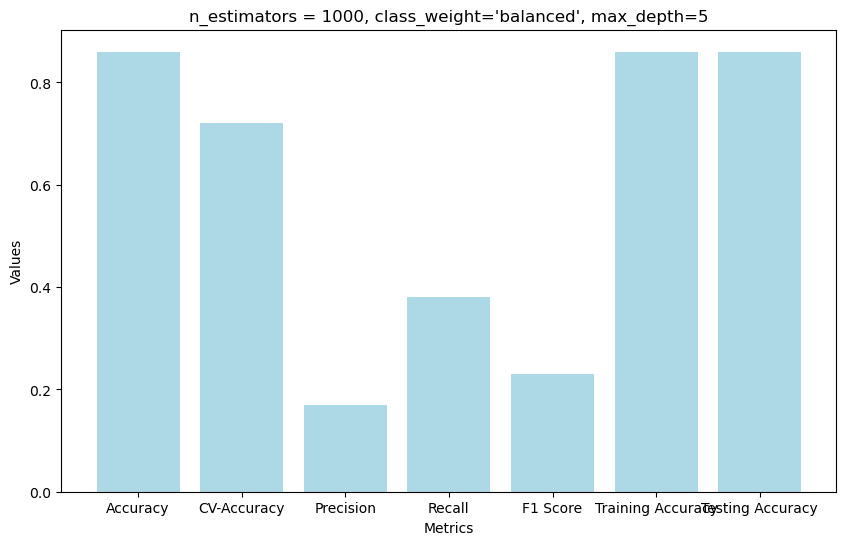

In [297]:
data = [
    ["Accuracy", 0.86],
    ["CV-Accuracy", 0.72],
    ["Precision", 0.17],
    ["Recall", 0.38],
    ["F1 Score", 0.23],
    ["Training Accuracy", 0.86],
    ["Testing Accuracy", 0.86],
]   
headers = ["n_estimators = 1000, class_weight='balanced', max_depth=5", "20%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print("CV = Cross-Validation")

def plot_bar_chart(data, headers, title):
    labels = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightblue')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(title)
    plt.show()
plot_bar_chart(data, headers, "n_estimators = 1000, class_weight='balanced', max_depth=5")

## Randon Forest - SMOTE 

In [ ]:
from imblearn.over_sampling import SMOTE

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2061, 7), (516, 7), (2061,), (516,))

In [486]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((3888, 7), (3888,))

In [528]:
rf_smote = RandomForestClassifier(n_estimators = 1000, random_state = 67, max_depth = 10)
rf_smote.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=67)

In [529]:
y_pred_smote = rf_smote.predict(X_test)

In [530]:
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_smote)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred_smote)) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred_smote)) )
print( "F1 Score: {:.2f}".format(metrics.f1_score(y_test, y_pred_smote)) )

Accuracy: 0.88
precision: 0.31
recall: 0.53
F1 Score: 0.39


In [521]:
scores = cross_val_score(rf_smote, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", scores)
print("Mean accuracy: ", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores:  [0.94379845 0.95348837 0.94174757 0.91650485 0.91650485]
Mean accuracy:  0.9344088206517649
Standard deviation: 0.01514698462303926


In [522]:
print("Training Accuracy :", rf_smote.score(X_train, y_train))
print("Testing Accuracy :", rf_smote.score(X_test, y_test))

Training Accuracy : 0.9388646288209607
Testing Accuracy : 0.877906976744186


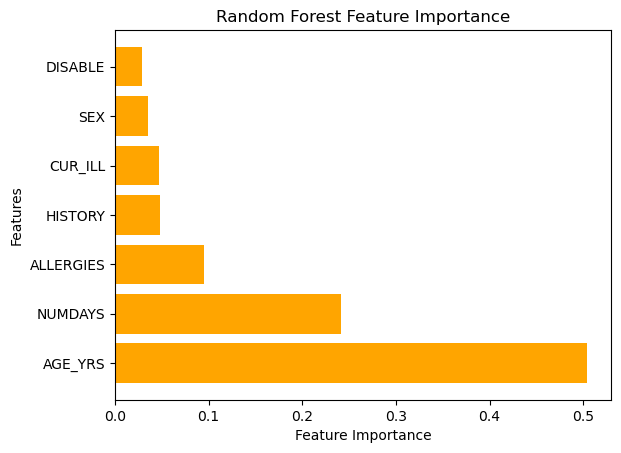

In [523]:
feature_imp = pd.Series(rf_smote.feature_importances_, index=X.columns).sort_values(ascending=False)
bar_color = 'orange'
plt.barh(feature_imp.index, feature_imp, color=bar_color)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

Text(50.722222222222214, 0.5, 'Actual')

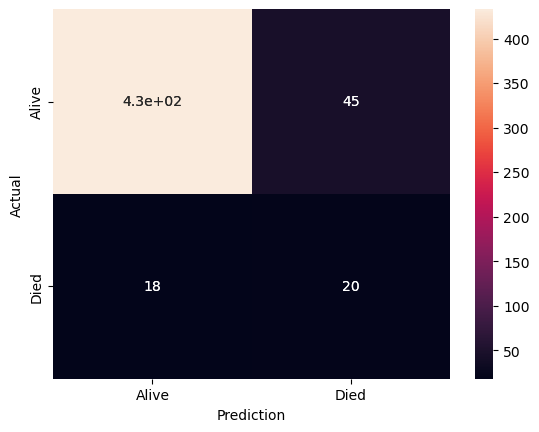

In [524]:
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True)
ax = sns.heatmap(cm, annot=True,                  
                 xticklabels=['Alive','Died'],                
                 yticklabels=['Alive','Died'],                  
                 cbar=False)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

+------------------------------------+-------+
| n_estimators = 1000, max_depth=5   |   20% |
+====================================+=======+
| Accuracy                           |  0.8  |
+------------------------------------+-------+
| CV-Accuracy                        |  0.94 |
+------------------------------------+-------+
| Precision                          |  0.23 |
+------------------------------------+-------+
| Recall                             |  0.68 |
+------------------------------------+-------+
| F1 Score                           |  0.34 |
+------------------------------------+-------+
| Training Accuracy                  |  0.83 |
+------------------------------------+-------+
| Testing Accuracy                   |  0.8  |
+------------------------------------+-------+
+-------------------------------------+-------+
| n_estimators = 1000, max_depth=10   |   20% |
+=====================================+=======+
| Accuracy                            |  0.88 |
+--------

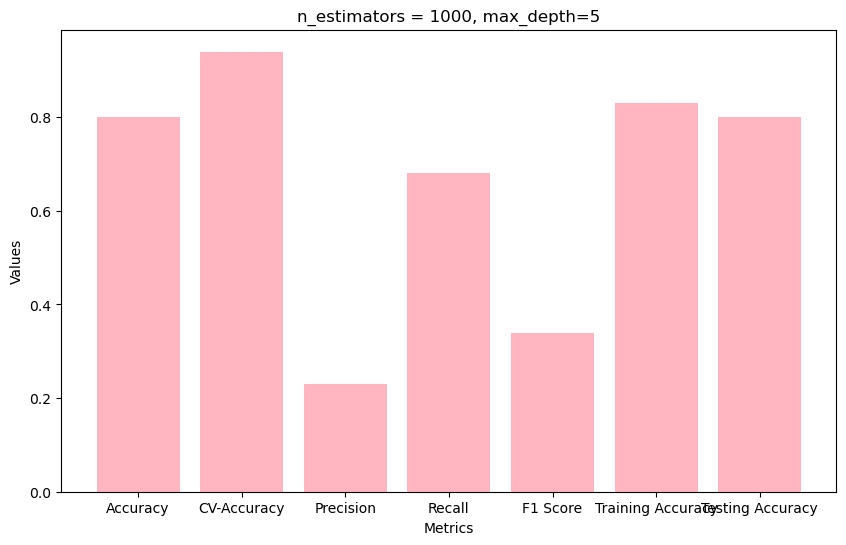

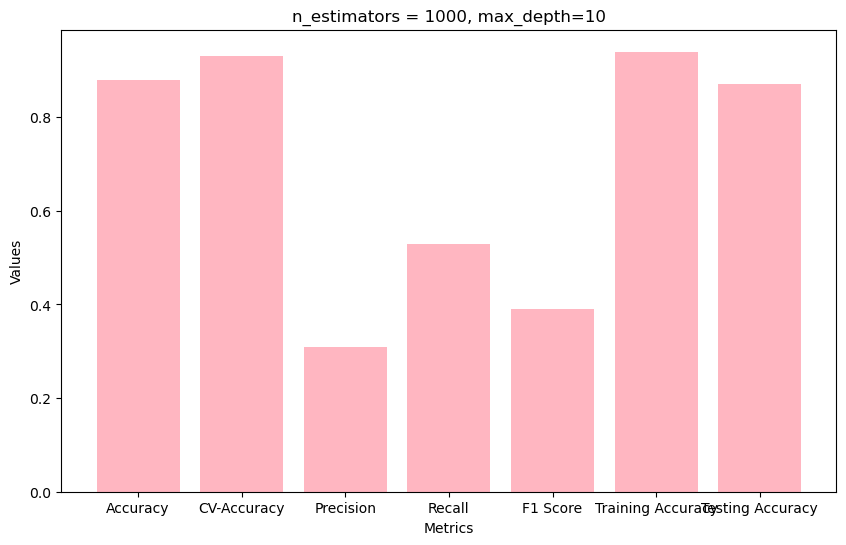

In [525]:
data = [
    ["Accuracy", 0.80],
    ["CV-Accuracy",0.94],
    ["Precision", 0.23],
    ["Recall", 0.68],
    ["F1 Score", 0.34],
    ["Training Accuracy", 0.83],
    ["Testing Accuracy", 0.80],
]   
headers = ["n_estimators = 1000, max_depth=5", "20%"]

data1 = [
    ["Accuracy", 0.88],
    ["CV-Accuracy", 0.93],
    ["Precision", 0.31],
    ["Recall", 0.53],
    ["F1 Score",0.39],
    ["Training Accuracy", 0.94],
    ["Testing Accuracy", 0.87],
]   
headers1 = ["n_estimators = 1000, max_depth=10", "20%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print("CV = Cross-Validation")

# Create bar chart
def plot_bar_chart(data, headers, title):
    labels = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightpink')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(title)
    plt.show()

plot_bar_chart(data, headers, "n_estimators = 1000, max_depth=5")
plot_bar_chart(data1, headers1, "n_estimators = 1000, max_depth=10")

## Principal Component Analysis - PCA

In [62]:
from sklearn.model_selection import train_test_split

data = df_rf
feature_names = ['AGE_YRS', 'SEX', 'DISABLE', 'NUMDAYS', 'CUR_ILL', 'HISTORY', 'ALLERGIES']

df_pca = pd.DataFrame(data=df_rf[feature_names], columns=feature_names)

df_pca['DIED'] = pd.Series(df_rf['DIED'])

df_pca.head()

,AGE_YRS,SEX,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES,DIED
1390,73.0,0,0,0.0,2,2,0,0
1391,4.0,0,0,0.0,0,0,1,0
1392,35.0,0,0,0.0,0,1,1,0
1393,25.0,0,0,0.0,0,2,1,0
1394,37.0,1,0,1.0,0,0,1,0


In [63]:
df_pca["DIED"].value_counts()

0    2422
1     155
Name: DIED, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

X = df_pca.drop('DIED', axis=1)
y = df_pca['DIED']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2577, 7), (2577,), (2061, 7), (516, 7), (2061,), (516,))

### Scaling the data

In [65]:
from sklearn.preprocessing import StandardScaler

# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[-0.58051911 -0.60081052 -0.20095682 ... -0.44433817 -1.04961724
   1.19950534]
 [-0.37454241 -0.60081052 -0.20095682 ... -0.44433817  0.71631021
  -0.63718151]
 [-0.25095638 -0.60081052 -0.20095682 ... -0.44433817  0.71631021
  -0.63718151]
 ...
 [ 0.90251317  1.35538297 -0.20095682 ...  1.46353886  0.71631021
  -0.63718151]
 [-0.45693309 -0.60081052 -0.20095682 ...  1.46353886  2.48223766
  -0.63718151]
 [ 0.24338771 -0.60081052 -0.20095682 ... -0.44433817 -1.04961724
  -0.63718151]] 	 [[-1.56920730e+00 -6.00810516e-01 -2.00956823e-01 ... -4.44338173e-01
  -1.04961724e+00 -6.37181515e-01]
 [ 1.64402931e+00  1.35538297e+00  4.97619332e+00 ...  1.46353886e+00
   7.16310213e-01 -6.37181515e-01]
 [-3.33347064e-01 -6.00810516e-01 -2.00956823e-01 ... -4.44338173e-01
  -1.04961724e+00  1.19950534e+00]
 ...
 [-3.78433476e-03 -6.00810516e-01 -2.00956823e-01 ... -4.44338173e-01
   7.16310213e-01 -6.37181515e-01]
 [ 3.25778395e-01 -6.00810516e-01 -2.00956823e-01 ... -4.44338173e-01
   7.163102

In [66]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 2)

# transform data into the first two principal components
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (2577, 7)
Reduced shape: (2577, 2)


In [67]:
# The amount of variance explained by each of the selected components.
print(pca.explained_variance_ratio_)

[0.2273969  0.16265725]


In [68]:
PCA_sum = 0.2233018 + 0.16230341
print(PCA_sum)

0.38560521000000003


In [69]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(X_pca, total_var)

[[ 3.82433098 -1.73948348]
 [-2.04192667  0.14180876]
 [-0.48500459 -0.55734692]
 ...
 [ 1.54012225  0.2298454 ]
 [ 3.39177534 -0.56521198]
 [ 1.45659912 -0.91911667]] 39.00541541716948


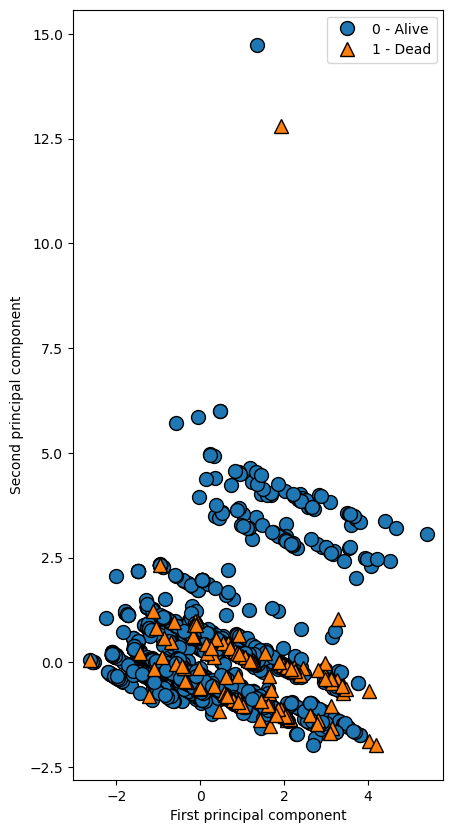

In [70]:
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(10, 10)) 
scatter = mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], df_pca['DIED'])
plt.legend(handles=scatter, labels=['0 - Alive', '1 - Dead'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [71]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.42126516  0.15781712  0.27878885  0.0268696   0.55253795  0.57700165
  -0.28452615]
 [-0.27072549  0.51083361  0.7094688   0.30998191 -0.14291247 -0.20013517
  -0.07644545]]


<Axes: >

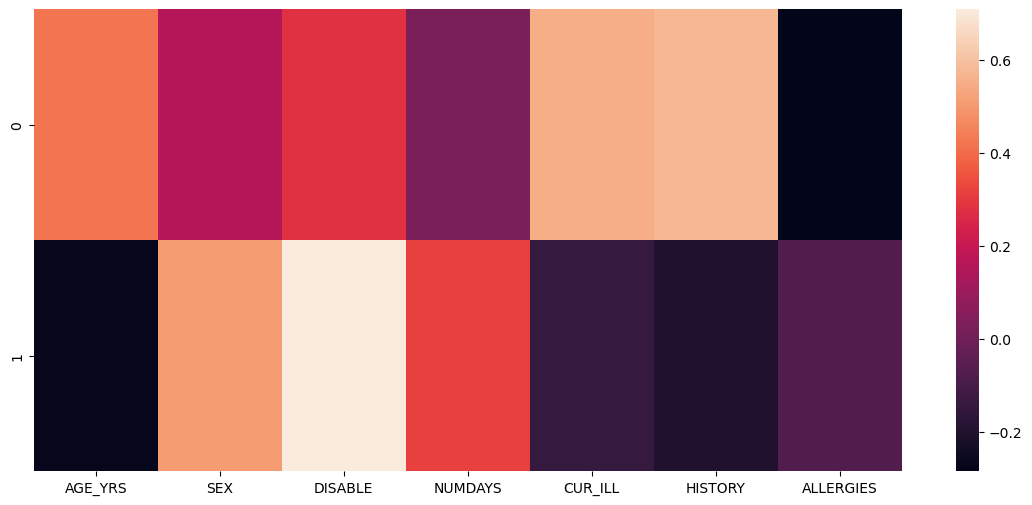

In [72]:
df_comp = pd.DataFrame(pca.components_, columns=['AGE_YRS', 'SEX', 'DISABLE', 'NUMDAYS', 'CUR_ILL', 'HISTORY', 'ALLERGIES'])

# Assuming df_pca is your original DataFrame with the data
# Get the original feature names
feature_names = df_pca[['AGE_YRS', 'SEX', 'DISABLE', 'NUMDAYS', 'CUR_ILL', 'HISTORY', 'ALLERGIES']].columns

# Rename the columns in df_comp with the original feature names
df_comp.columns = feature_names

plt.figure(figsize =(14, 6))
sns.heatmap(df_comp)

## Random Forest with PCA

In [73]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

X = df_pca.drop('DIED', axis=1)
y = df_pca['DIED']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Data scaling
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train your Random Forest model
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42, class_weight='balanced', max_depth=5)
rf_model.fit(X_train_pca, y_train)

# Make predictions
predictions = rf_model.predict(X_test_pca)

# Perform cross-validation on the training data
cv_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=5)

# Evaluate accuracy, precision and recall on the test set
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy: ", accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Test Set Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy:  0.8449612403100775
Cross-Validation Scores: [0.86426593 0.81717452 0.86426593 0.86944444 0.85      ]
Mean CV Accuracy: 0.853030163127116
Test Set Accuracy: 0.8449612403100775
Precision: 0.2536231884057971
Recall: 0.6730769230769231
F1 Score: 0.368421052631579


## Accuracy: Train and test

In [74]:
print("Training Accuracy :", rf_model.score(X_train_pca, y_train))
print("Testing Accuracy :", rf_model.score(X_test_pca, y_test))

Training Accuracy : 0.8746533555185801
Testing Accuracy : 0.8449612403100775


Text(50.722222222222214, 0.5, 'Actual')

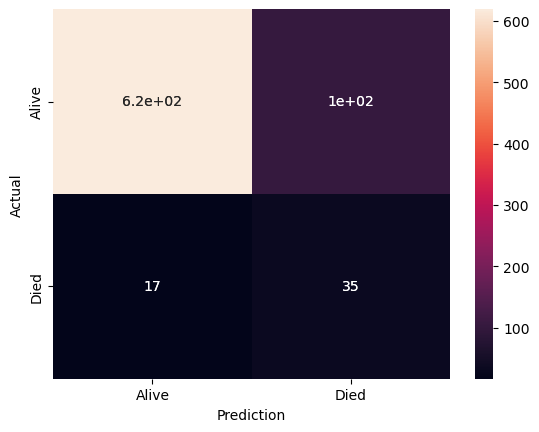

In [75]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)
ax = sns.heatmap(cm, annot=True,                  
                 xticklabels=['Alive','Died'],                
                 yticklabels=['Alive','Died'],                  
                 cbar=False)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

## Model Evaluation: Random Forest with PCA

In [76]:
from tabulate import tabulate
data = [
    ["Accuracy", 0.92, 0.91, 0.91],
    ["CV-Accuracy", 0.92, 0.93, 0.92],
    ["Precision", 0.22, 0.21, 0.34],
    ["Recall", 0.13, 0.12, 0.19],
    ["F1 Score", 0.16, 0.15, 0.25],
    ["Training Accuracy", 0.99, 0.99, 0.99],
    ["Testing Accuracy", 0.92, 0.91, 0.92],
]   
headers = ["n_estimators = 100", "10%", "20%", "30%"]


data1 = [
    ["Accuracy", 0.92, 0.91, 0.92],
    ["CV-Accuracy", 0.93, 0.93, 0.93],
    ["Precision", 0.20, 0.19, 0.29],
    ["Recall", 0.13, 0.09, 0.15],
    ["F1 Score", 0.16, 0.12, 0.20],
    ["Training Accuracy", 0.99, 0.99, 0.99],
    ["Testing Accuracy", 0.92, 0.91, 0.92],
]   
headers1 = ["n_estimators = 10000", "10%",  "20%", "30%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print("CV = Cross-Validation")

+----------------------+-------+-------+-------+
| n_estimators = 100   |   10% |   20% |   30% |
+======================+=======+=======+=======+
| Accuracy             |  0.92 |  0.91 |  0.91 |
+----------------------+-------+-------+-------+
| CV-Accuracy          |  0.92 |  0.93 |  0.92 |
+----------------------+-------+-------+-------+
| Precision            |  0.22 |  0.21 |  0.34 |
+----------------------+-------+-------+-------+
| Recall               |  0.13 |  0.12 |  0.19 |
+----------------------+-------+-------+-------+
| F1 Score             |  0.16 |  0.15 |  0.25 |
+----------------------+-------+-------+-------+
| Training Accuracy    |  0.99 |  0.99 |  0.99 |
+----------------------+-------+-------+-------+
| Testing Accuracy     |  0.92 |  0.91 |  0.92 |
+----------------------+-------+-------+-------+
+------------------------+-------+-------+-------+
| n_estimators = 10000   |   10% |   20% |   30% |
+========================+=======+=======+=======+
| Accuracy    

### Adjusting hyperparameters

+------------------------------------------------+-------+
| n_estimators = 1000, class_weight='balanced'   |   30% |
+================================================+=======+
| Accuracy                                       |  0.91 |
+------------------------------------------------+-------+
| CV-Accuracy                                    |  0.92 |
+------------------------------------------------+-------+
| Precision                                      |  0.29 |
+------------------------------------------------+-------+
| Recall                                         |  0.23 |
+------------------------------------------------+-------+
| F1 Score                                       |  0.25 |
+------------------------------------------------+-------+
| Training Accuracy                              |  0.98 |
+------------------------------------------------+-------+
| Testing Accuracy                               |  0.91 |
+------------------------------------------------+------

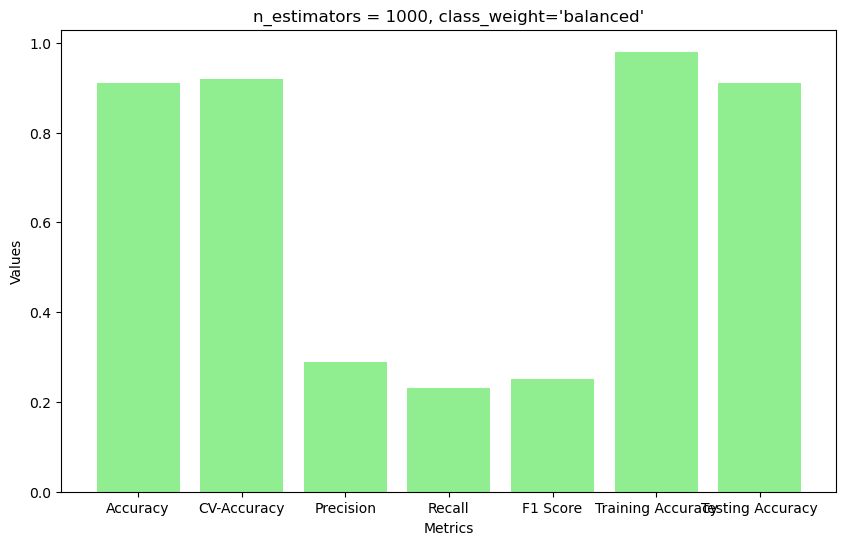

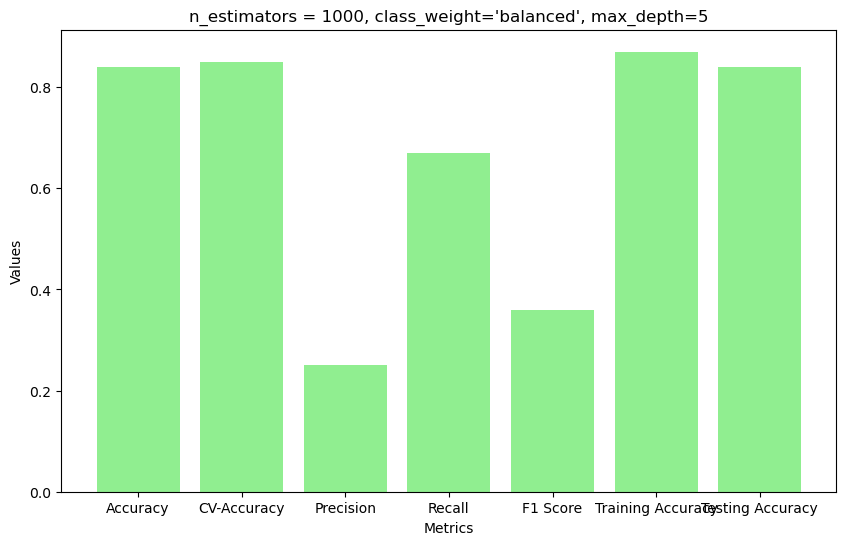

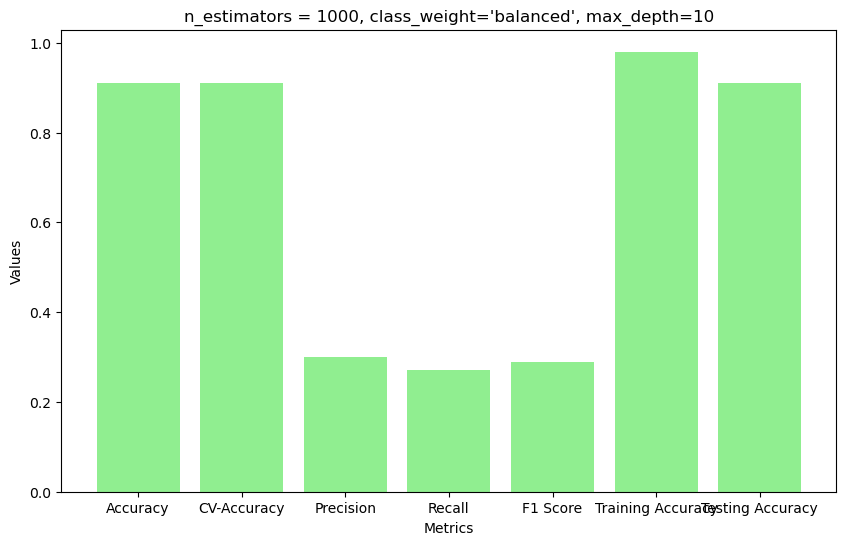

In [77]:
import matplotlib.pyplot as plt
from tabulate import tabulate
data = [
    ["Accuracy", 0.91],
    ["CV-Accuracy", 0.92],
    ["Precision", 0.29],
    ["Recall", 0.23],
    ["F1 Score", 0.25],
    ["Training Accuracy", 0.98],
    ["Testing Accuracy", 0.91],
]   
headers = ["n_estimators = 1000, class_weight='balanced'", "30%"]

data1 = [
    ["Accuracy", 0.84],
    ["CV-Accuracy", 0.85],
    ["Precision", 0.25],
    ["Recall", 0.67],
    ["F1 Score", 0.36],
    ["Training Accuracy", 0.87],
    ["Testing Accuracy", 0.84],
]   
headers1 = ["n_estimators = 1000, class_weight='balanced', max_depth=5", "30%"]

data2 = [
    ["Accuracy", 0.91],
    ["CV-Accuracy", 0.91],
    ["Precision", 0.30],
    ["Recall", 0.27],
    ["F1 Score", 0.29],
    ["Training Accuracy", 0.98],
    ["Testing Accuracy", 0.91],
]   
headers2 = ["n_estimators = 1000, class_weight='balanced', max_depth=10", "30%"]


print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print(tabulate(data2, headers=headers2, tablefmt="grid"))
print("CV = Cross-Validation")

# Create bar chart
def plot_bar_chart(data, headers, title):
    labels = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightgreen')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(title)
    plt.show()

# Plot charts
plot_bar_chart(data, headers, "n_estimators = 1000, class_weight='balanced'")
plot_bar_chart(data1, headers1, "n_estimators = 1000, class_weight='balanced', max_depth=5")
plot_bar_chart(data2, headers2, "n_estimators = 1000, class_weight='balanced', max_depth=10")

## Model Evaluation: all features four features: DISABLE, CUR_ILL, HISTORY, ALLERGIES
#### (n_estimators = 1000, random_state = 51, class_weight='balanced', max_depth=5)

+-------------------------------------------------------------+-------+
| n_estimators = 1000, class_weight='balanced', max_depth=5   |   20% |
+=============================================================+=======+
| Accuracy                                                    |  0.66 |
+-------------------------------------------------------------+-------+
| CV-Accuracy                                                 |  0.74 |
+-------------------------------------------------------------+-------+
| Precision                                                   |  0.13 |
+-------------------------------------------------------------+-------+
| Recall                                                      |  0.75 |
+-------------------------------------------------------------+-------+
| F1 Score                                                    |  0.23 |
+-------------------------------------------------------------+-------+
| Training Accuracy                                           | 

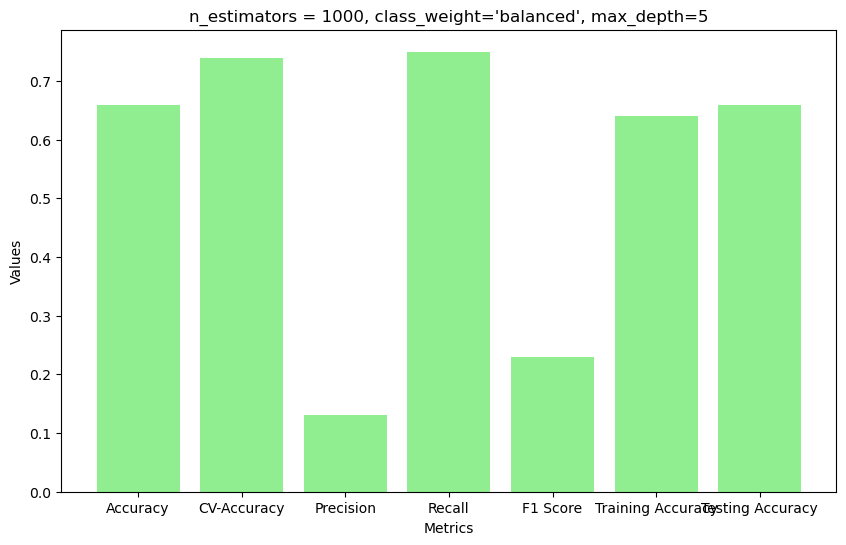

In [78]:
data = [
    ["Accuracy", 0.66],
    ["CV-Accuracy", 0.74],
    ["Precision", 0.13],
    ["Recall", 0.75],
    ["F1 Score", 0.23],
    ["Training Accuracy", 0.64],
    ["Testing Accuracy", 0.66],
]   
headers = ["n_estimators = 1000, class_weight='balanced', max_depth=5", "20%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print("CV = Cross-Validation")

# Create bar chart
def plot_bar_chart(data, headers, title):
    labels = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightgreen')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(title)
    plt.show()
plot_bar_chart(data, headers, "n_estimators = 1000, class_weight='balanced', max_depth=5")

# ANN withSMOTE 

In [79]:
from sklearn.preprocessing import StandardScaler

# Assuming resampled_df is your original DataFrame
# and smote_scaled is the scaled data

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the original DataFrame
smote_scaled = scaler.fit_transform(resampled_df)

# Convert the scaled data array into a DataFrame
smote_scaled_df = pd.DataFrame(data=smote_scaled, columns=resampled_df.columns)

# Now, smote_scaled_df contains the scaled data in a DataFrame

In [80]:
smote_scaled_df.head()

,AGE_YRS,SEX,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES,DIED
0,0.681370,-0.655346,-0.149574,-0.097055,3.043537,2.516775,-0.460564,-1.0
1,-1.841835,-0.655346,-0.149574,-0.097055,-0.607502,-1.330262,1.750510,-1.0
2,-0.708221,-0.655346,-0.149574,-0.097055,-0.607502,0.593257,1.750510,-1.0
3,-1.073903,-0.655346,-0.149574,-0.097055,-0.607502,2.516775,1.750510,-1.0
4,-0.635085,1.364052,-0.149574,-0.083075,-0.607502,-1.330262,1.750510,-1.0


In [81]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense
import tensorflow

model_smote = Sequential()

In [82]:
X = smote_scaled_df.drop('DIED', axis=1)
y = smote_scaled_df['DIED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=26)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4359, 7), (485, 7), (4359,), (485,))

In [83]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [84]:
model_smote = Sequential()
model_smote.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model_smote.add(Dense(units=32, activation='relu'))
model_smote.add(Dense(units=1, activation='sigmoid'))

model_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Perform K-fold cross-validation

X = np.array(X)
y = np.array(y)

# Initialize lists to store metric scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Train the model on the current fold
    model_smote.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
    
    # Make predictions on the validation set
    y_pred_prob = model_smote.predict(X_val)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    

    # Calculate and store metric scores
    precision_scores.append(precision_score(y_val, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_val, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_val, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_val, y_pred, average='weighted'))

# Print average scores across all folds
print(f"Average Accuracy: {np.mean(accuracy_scores)}")
print(f"Average Precision: {np.mean(precision_scores)}")
print(f"Average Recall: {np.mean(recall_scores)}")


Epoch 1/10
122/122 [==============================] - 1s 2ms/step - loss: -0.7957 - accuracy: 0.0467 - val_loss: -3.9652 - val_accuracy: 0.1476
Epoch 2/10
122/122 [==============================] - 0s 1ms/step - loss: -15.6738 - accuracy: 0.1840 - val_loss: -45.4624 - val_accuracy: 0.2074
Epoch 3/10
122/122 [==============================] - 0s 1ms/step - loss: -93.5274 - accuracy: 0.2307 - val_loss: -200.5811 - val_accuracy: 0.2301
Epoch 4/10
122/122 [==============================] - 0s 1ms/step - loss: -299.6433 - accuracy: 0.2366 - val_loss: -540.6631 - val_accuracy: 0.2466
Epoch 5/10
122/122 [==============================] - 0s 1ms/step - loss: -679.7305 - accuracy: 0.2526 - val_loss: -1106.4308 - val_accuracy: 0.2497
Epoch 6/10
122/122 [==============================] - 0s 1ms/step - loss: -1280.0933 - accuracy: 0.2545 - val_loss: -1957.8270 - val_accuracy: 0.2528
Epoch 7/10
122/122 [==============================] - 0s 1ms/step - loss: -2134.3381 - accuracy: 0.2609 - val_loss: 

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


122/122 [==============================] - 0s 1ms/step - loss: -11215.9961 - accuracy: 0.2612 - val_loss: -13676.0674 - val_accuracy: 0.2580
Epoch 3/10
122/122 [==============================] - 0s 1ms/step - loss: -14161.9062 - accuracy: 0.2594 - val_loss: -17097.9609 - val_accuracy: 0.2580
Epoch 4/10
122/122 [==============================] - 0s 1ms/step - loss: -17483.2539 - accuracy: 0.2632 - val_loss: -20894.7129 - val_accuracy: 0.2611
Epoch 5/10
122/122 [==============================] - 0s 1ms/step - loss: -21254.2266 - accuracy: 0.2630 - val_loss: -25250.4980 - val_accuracy: 0.2590
Epoch 6/10
122/122 [==============================] - 0s 1ms/step - loss: -25539.1445 - accuracy: 0.2661 - val_loss: -30061.0234 - val_accuracy: 0.2487
Epoch 7/10
122/122 [==============================] - 0s 1ms/step - loss: -30216.4961 - accuracy: 0.2617 - val_loss: -35395.3984 - val_accuracy: 0.2466
Epoch 8/10
122/122 [==============================] - 0s 1ms/step - loss: -35409.5703 - accuracy: 0

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


122/122 [==============================] - 0s 2ms/step - loss: -55360.2852 - accuracy: 0.2604 - val_loss: -55856.3828 - val_accuracy: 0.2497
Epoch 2/10
122/122 [==============================] - 0s 1ms/step - loss: -62817.6328 - accuracy: 0.2599 - val_loss: -63161.1406 - val_accuracy: 0.2508
Epoch 3/10
122/122 [==============================] - 0s 1ms/step - loss: -70911.6953 - accuracy: 0.2601 - val_loss: -71077.2656 - val_accuracy: 0.2012
Epoch 4/10
122/122 [==============================] - 0s 1ms/step - loss: -79478.7891 - accuracy: 0.2583 - val_loss: -79390.7500 - val_accuracy: 0.2508
Epoch 5/10
122/122 [==============================] - 0s 1ms/step - loss: -88532.9453 - accuracy: 0.2612 - val_loss: -88180.7734 - val_accuracy: 0.2291
Epoch 6/10
122/122 [==============================] - 0s 1ms/step - loss: -98268.7812 - accuracy: 0.2570 - val_loss: -97593.3750 - val_accuracy: 0.2374
Epoch 7/10
122/122 [==============================] - 0s 1ms/step - loss: -108535.9062 - accuracy: 

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


122/122 [==============================] - 0s 2ms/step - loss: -154858.1875 - accuracy: 0.2423 - val_loss: -154894.8594 - val_accuracy: 0.2487
Epoch 2/10
122/122 [==============================] - 0s 1ms/step - loss: -167714.9688 - accuracy: 0.2423 - val_loss: -167313.4219 - val_accuracy: 0.2776
Epoch 3/10
122/122 [==============================] - 0s 1ms/step - loss: -181359.5625 - accuracy: 0.2328 - val_loss: -180786.3594 - val_accuracy: 0.2848
Epoch 4/10
122/122 [==============================] - 0s 1ms/step - loss: -195634.7500 - accuracy: 0.2477 - val_loss: -194783.4844 - val_accuracy: 0.2786
Epoch 5/10
122/122 [==============================] - 0s 1ms/step - loss: -210457.7969 - accuracy: 0.2408 - val_loss: -209217.2031 - val_accuracy: 0.2817
Epoch 6/10
122/122 [==============================] - 0s 1ms/step - loss: -225711.3281 - accuracy: 0.2490 - val_loss: -223953.7500 - val_accuracy: 0.2384
Epoch 7/10
122/122 [==============================] - 0s 1ms/step - loss: -241803.2969 

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


122/122 [==============================] - 0s 1ms/step - loss: -319560.9688 - accuracy: 0.2332 - val_loss: -280574.3750 - val_accuracy: 0.1674
Epoch 2/10
122/122 [==============================] - 0s 1ms/step - loss: -339744.5938 - accuracy: 0.2461 - val_loss: -297991.4062 - val_accuracy: 0.2386
Epoch 3/10
122/122 [==============================] - 0s 1ms/step - loss: -360487.7500 - accuracy: 0.2386 - val_loss: -315759.6562 - val_accuracy: 0.2376
Epoch 4/10
122/122 [==============================] - 0s 1ms/step - loss: -381685.2188 - accuracy: 0.2278 - val_loss: -334300.2500 - val_accuracy: 0.3006
Epoch 5/10
122/122 [==============================] - 0s 1ms/step - loss: -403878.5312 - accuracy: 0.2389 - val_loss: -353333.9375 - val_accuracy: 0.2800
Epoch 6/10
122/122 [==============================] - 0s 1ms/step - loss: -426752.7812 - accuracy: 0.2443 - val_loss: -373151.0625 - val_accuracy: 0.2634
Epoch 7/10
122/122 [==============================] - 0s 1ms/step - loss: -450110.1875 

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of emp

# Artificial Neural Networks - ANN

In [86]:
# !pip install tensorflow
# !pip install keras

In [87]:
from keras.models import Sequential
# from keras import models
model_ann = Sequential()

from sklearn.preprocessing import StandardScaler

# Assuming resampled_df is your original DataFrame
# and smote_scaled is the scaled data

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the original DataFrame
df_scaled = scaler.fit_transform(df_rf)

# Convert the scaled data array into a DataFrame
scaled_df = pd.DataFrame(data=df_scaled, columns=resampled_df.columns)

# Now, smote_scaled_df contains the scaled data in a DataFrame

In [88]:
df_ann = df_rf.copy()
df_ann

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73.0,0,0,0,0.0,2,2,0
1391,4.0,0,0,0,0.0,0,0,1
1392,35.0,0,0,0,0.0,0,1,1
1393,25.0,0,0,0,0.0,0,2,1
1394,37.0,1,0,0,1.0,0,0,1
...,...,...,...,...,...,...,...,...
3963,62.0,1,1,0,2.0,1,1,0
3964,79.0,1,1,0,3.0,1,1,0
3965,43.0,1,1,0,2.0,1,1,0
3966,89.0,1,1,0,0.0,2,1,0


In [89]:
df_ann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 1390 to 3967
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE_YRS    2577 non-null   float64
 1   SEX        2577 non-null   int64  
 2   DIED       2577 non-null   int64  
 3   DISABLE    2577 non-null   int64  
 4   NUMDAYS    2577 non-null   float64
 5   CUR_ILL    2577 non-null   int64  
 6   HISTORY    2577 non-null   int64  
 7   ALLERGIES  2577 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 181.2 KB


In [90]:
from sklearn import preprocessing
# Perform scaling
df_scaled = preprocessing.scale(df_ann)

# Convert the scaled array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_ann.columns)

# Assign 'Outcome' column from df_ann to df_scaled_ann
df_scaled['DIED'] = df_ann['DIED']

df_ann

,AGE_YRS,SEX,DIED,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,73.0,0,0,0,0.0,2,2,0
1391,4.0,0,0,0,0.0,0,0,1
1392,35.0,0,0,0,0.0,0,1,1
1393,25.0,0,0,0,0.0,0,2,1
1394,37.0,1,0,0,1.0,0,0,1
...,...,...,...,...,...,...,...,...
3963,62.0,1,1,0,2.0,1,1,0
3964,79.0,1,1,0,3.0,1,1,0
3965,43.0,1,1,0,2.0,1,1,0
3966,89.0,1,1,0,0.0,2,1,0


In [91]:
from sklearn.model_selection import train_test_split
#X = df_ann.loc[:, df_ann.columns != ['DIED', 'AGE_YRS']]
X = df_ann.loc[:, ~df_ann.columns.isin(['DIED', 'AGE_YRS'])]
y = df_ann.loc[:, 'DIED']
X

,SEX,DISABLE,NUMDAYS,CUR_ILL,HISTORY,ALLERGIES
1390,0,0,0.0,2,2,0
1391,0,0,0.0,0,0,1
1392,0,0,0.0,0,1,1
1393,0,0,0.0,0,2,1
1394,1,0,1.0,0,0,1
...,...,...,...,...,...,...
3963,1,0,2.0,1,1,0
3964,1,0,3.0,1,1,0
3965,1,0,2.0,1,1,0
3966,1,0,0.0,2,1,0


In [92]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 35)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2319, 6), (258, 6), (2319,), (258,))

In [93]:
# Fixing a random seed ensures reproducible results
import numpy as np
import random
import tensorflow

In [94]:
from keras.models import Sequential 
model_ann = Sequential()

In [95]:
# Let's add the first hidden layer:
from keras.layers import Dense
# Add the first hidden layer
model_ann.add(Dense(64, activation = 'relu', input_dim = 6))

In [96]:
# Let's add our second hidden layer:
# Add the second hidden layer
model_ann.add(Dense(16, activation = 'relu'))

In [97]:
# Let's add our second hidden layer:
# Add the second hidden layer
model_ann.add(Dense(16, activation = 'relu'))

In [98]:
# Now we add the output layer as follows:
# Add the output layer
model_ann.add(Dense(1, activation = 'sigmoid'))

In [99]:
# COMPILATION MODEL

# Then, we can run the compile() function as follows:
    # Compile the model
model_ann.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [100]:
# model trainning

# To train our MLP model defined in earlier steps, let's call the fit function. Let's train our model for 200 iterations:
# Train the model for 200 epochs
model_ann.fit(X_train, y_train, epochs = 200, batch_size=32)

Epoch 1/200
73/73 [==============================] - 1s 1ms/step - loss: 0.6698 - accuracy: 0.8008
Epoch 2/200
73/73 [==============================] - 0s 892us/step - loss: 0.3573 - accuracy: 0.9426
Epoch 3/200
73/73 [==============================] - 0s 850us/step - loss: 0.2702 - accuracy: 0.9431
Epoch 4/200
73/73 [==============================] - 0s 929us/step - loss: 0.2539 - accuracy: 0.9414
Epoch 5/200
73/73 [==============================] - 0s 891us/step - loss: 0.2361 - accuracy: 0.9431
Epoch 6/200
73/73 [==============================] - 0s 885us/step - loss: 0.2447 - accuracy: 0.9426
Epoch 7/200
73/73 [==============================] - 0s 899us/step - loss: 0.1996 - accuracy: 0.9426
Epoch 8/200
73/73 [==============================] - 0s 867us/step - loss: 0.2018 - accuracy: 0.9422
Epoch 9/200
73/73 [==============================] - 0s 894us/step - loss: 0.2408 - accuracy: 0.9409
Epoch 10/200
73/73 [==============================] - 0s 984us/step - loss: 0.2085 - accuracy

73/73 [==============================] - 0s 841us/step - loss: 0.1653 - accuracy: 0.9431
Epoch 82/200
73/73 [==============================] - 0s 895us/step - loss: 0.1662 - accuracy: 0.9426
Epoch 83/200
73/73 [==============================] - 0s 881us/step - loss: 0.1678 - accuracy: 0.9422
Epoch 84/200
73/73 [==============================] - 0s 880us/step - loss: 0.1697 - accuracy: 0.9426
Epoch 85/200
73/73 [==============================] - 0s 887us/step - loss: 0.1675 - accuracy: 0.9426
Epoch 86/200
73/73 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.9409
Epoch 87/200
73/73 [==============================] - 0s 990us/step - loss: 0.1648 - accuracy: 0.9414
Epoch 88/200
73/73 [==============================] - 0s 936us/step - loss: 0.1673 - accuracy: 0.9426
Epoch 89/200
73/73 [==============================] - 0s 912us/step - loss: 0.1650 - accuracy: 0.9444
Epoch 90/200
73/73 [==============================] - 0s 878us/step - loss: 0.1654 - accuracy: 0.

Epoch 161/200
73/73 [==============================] - 0s 890us/step - loss: 0.1580 - accuracy: 0.9452
Epoch 162/200
73/73 [==============================] - 0s 871us/step - loss: 0.1558 - accuracy: 0.9478
Epoch 163/200
73/73 [==============================] - 0s 912us/step - loss: 0.1550 - accuracy: 0.9478
Epoch 164/200
73/73 [==============================] - 0s 863us/step - loss: 0.1560 - accuracy: 0.9474
Epoch 165/200
73/73 [==============================] - 0s 866us/step - loss: 0.1550 - accuracy: 0.9478
Epoch 166/200
73/73 [==============================] - 0s 887us/step - loss: 0.1547 - accuracy: 0.9491
Epoch 167/200
73/73 [==============================] - 0s 888us/step - loss: 0.1546 - accuracy: 0.9478
Epoch 168/200
73/73 [==============================] - 0s 889us/step - loss: 0.1558 - accuracy: 0.9474
Epoch 169/200
73/73 [==============================] - 0s 877us/step - loss: 0.1544 - accuracy: 0.9474
Epoch 170/200
73/73 [==============================] - 0s 952us/step - lo

In [101]:
# Testing ACCURACY

scores = model_ann.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model_ann.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

73/73 [==============================] - 0s 664us/step - loss: 0.1492 - accuracy: 0.9487
Training Accuracy: 94.87%

9/9 [==============================] - 0s 998us/step - loss: 0.2213 - accuracy: 0.9186
Testing Accuracy: 91.86%



9/9 [==============================] - 0s 1ms/step


Text(50.722222222222214, 0.5, 'Actual')

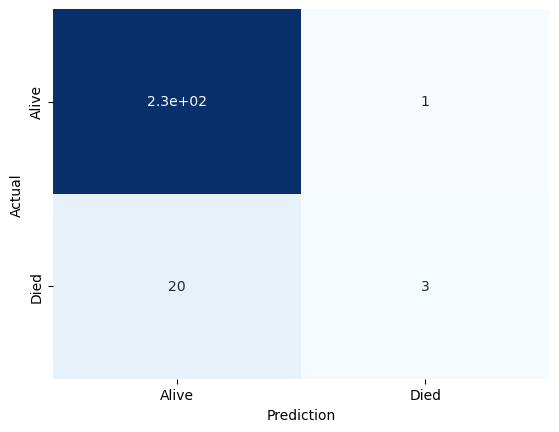

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model_ann.predict(X_test)
y_test_pred = y_test_pred.flatten()
y_test_pred_new = np.where(y_test_pred.round(2) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_new)
ax = sns.heatmap(c_matrix, annot=True,                  
                 xticklabels=['Alive','Died'],                
                 yticklabels=['Alive','Died'],                  
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

### ROC Curve

In [103]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model_ann.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [104]:
#Then, run the roc_curve function in order to get the corresponding false positive rate and true positive rate for the ROC curve:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

In [105]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

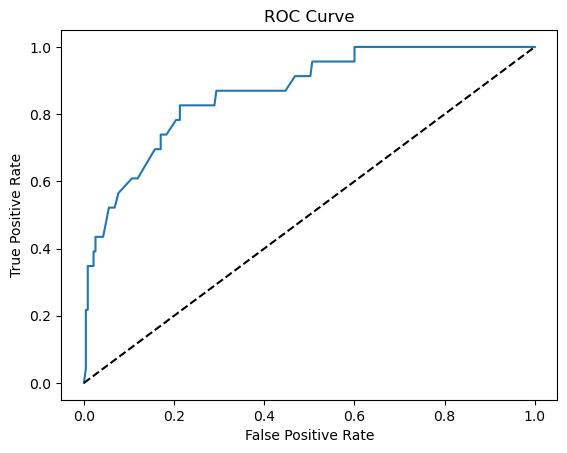

In [106]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Model Evaluation: ANN

In [107]:
from tabulate import tabulate
data = [
    ["Training Accuracy", 0.95, 0.95, 0.94],
    ["Testing Accuracy", 0.92, 0.92, 0.93],
]   
headers = ['Parameters', "10%", "20%", "30%"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print("CV = Cross-Validation")

+-------------------+-------+-------+-------+
| Parameters        |   10% |   20% |   30% |
+===================+=======+=======+=======+
| Training Accuracy |  0.95 |  0.95 |  0.94 |
+-------------------+-------+-------+-------+
| Testing Accuracy  |  0.92 |  0.92 |  0.93 |
+-------------------+-------+-------+-------+
CV = Cross-Validation


### Reference

Scikit-learn.org. (2012). 3.2. Tuning the hyper-parameters of an estimator — scikit-learn 0.22 documentation. [online] Available at: https://scikit-learn.org/stable/modules/grid_search.html [Accessed 19 Nov. 2023].

Müller, A. C. and Guido, S. (2017). Introduction to machine learning with Python: a guide for data scientists. 1st ed. United States of America. O’reilly Media.

